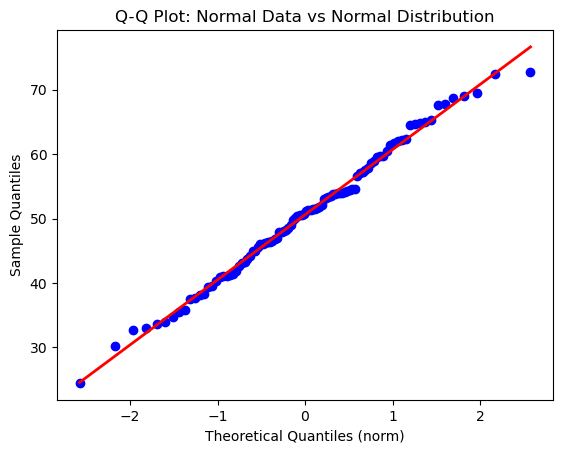

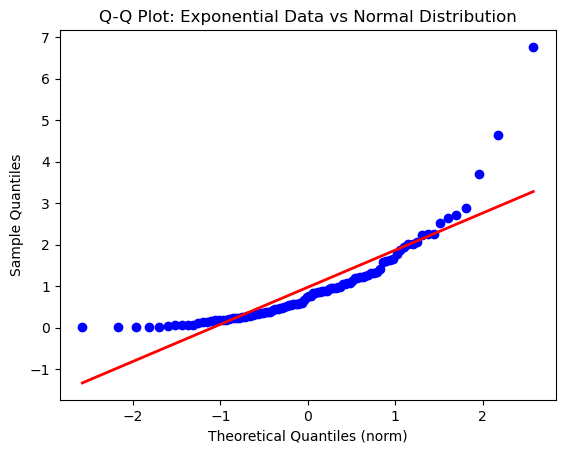

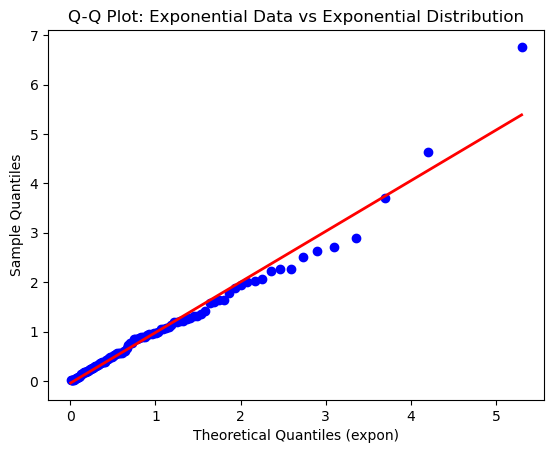

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Step 1: Generate Data
np.random.seed(0)
data_normal = np.random.normal(loc=50, scale=10, size=100)
data_exp = np.random.exponential(scale=1.0, size=100)

# Step 2: Q-Q Plot Function
def create_qq_plot(data, dist="norm", title="Q-Q Plot"):
    n = len(data)
    p = (np.arange(1, n+1) - 0.5) / n  # probabilities
    
    if dist == "norm":
        theo_q = norm.ppf(p)   # standard normal
    elif dist == "expon":
        theo_q = expon.ppf(p, scale=1)  # mean=1
    else:
        raise ValueError("Unsupported distribution")
    
    sorted_data = np.sort(data)
    
    plt.scatter(theo_q, sorted_data, color="blue")
    plt.title(title)
    plt.xlabel(f"Theoretical Quantiles ({dist})")
    plt.ylabel("Sample Quantiles")
    
    # Fit line
    coeffs = np.polyfit(theo_q, sorted_data, 1)
    x_line = np.linspace(min(theo_q), max(theo_q), 100)
    y_line = coeffs[0]*x_line + coeffs[1]
    plt.plot(x_line, y_line, "r-", linewidth=2)
    
    plt.show()

# Step 3: Generate Plots
create_qq_plot(data_normal, dist="norm", title="Q-Q Plot: Normal Data vs Normal Distribution")
create_qq_plot(data_exp, dist="norm", title="Q-Q Plot: Exponential Data vs Normal Distribution")
create_qq_plot(data_exp, dist="expon", title="Q-Q Plot: Exponential Data vs Exponential Distribution")
